In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import base64
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [16]:
key = RSA.generate(4096)
private_key = key.export_key() 
public_key = key.publickey().export_key()

In [17]:
with open("private.pem", "wb") as priv_file:
    priv_file.write(private_key)

with open("public.pem", "wb") as pub_file:
    pub_file.write(public_key)

# Criptografia

In [ ]:
tempos_execucao = []
execucoes = []

for rodagem in range(218, 300):
    inicio = time.perf_counter()
    print(f'Iniciando criptografia: arquivo {rodagem}')

    dicom_path = f'C:\\Users\\CarlosChinen\\OneDrive\\Main\\FEI\\TCC\\Imagens DICOM\\slice_{rodagem}.dcm'

    with open(dicom_path, "rb") as dicom_file:
        image_data = dicom_file.read()

    rsa_key = RSA.import_key(public_key)
    cipher = PKCS1_OAEP.new(rsa_key)

    chunk_size = 470
    encrypted_chunks = []

    for i in range(0, len(image_data), chunk_size):
        chunk = image_data[i : i + chunk_size]
        encrypted_chunk = cipher.encrypt(chunk)
        encrypted_chunks.append(encrypted_chunk)

    encrypted_data = b"".join(encrypted_chunks)
    encrypted_base64 = base64.b64encode(encrypted_data)
    os.makedirs(os.path.dirname('crypto_metrics'), exist_ok=True)
    with open(f"crypto_metrics/imagem_criptografada_{rodagem}.enc", "wb") as enc_file:
        enc_file.write(encrypted_base64)
    
    fim = time.perf_counter()
    tempo_execucao = fim - inicio
    tempos_execucao.append(tempo_execucao)
    execucoes.append(rodagem)
    
    print(f'Criptografia finalizada: arquivo {rodagem}')
    print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f}')

Iniciando criptografia: arquivo 218
Criptografia finalizada: arquivo 218
Tempo de execução: 1.63633 segundos

Iniciando criptografia: arquivo 219
Criptografia finalizada: arquivo 219
Tempo de execução: 1.62590 segundos

Iniciando criptografia: arquivo 220
Criptografia finalizada: arquivo 220
Tempo de execução: 1.57371 segundos

Iniciando criptografia: arquivo 221
Criptografia finalizada: arquivo 221
Tempo de execução: 1.54983 segundos

Iniciando criptografia: arquivo 222
Criptografia finalizada: arquivo 222
Tempo de execução: 1.54802 segundos

Iniciando criptografia: arquivo 223
Criptografia finalizada: arquivo 223
Tempo de execução: 1.58753 segundos

Iniciando criptografia: arquivo 224
Criptografia finalizada: arquivo 224
Tempo de execução: 1.55068 segundos

Iniciando criptografia: arquivo 225
Criptografia finalizada: arquivo 225
Tempo de execução: 1.52384 segundos

Iniciando criptografia: arquivo 226
Criptografia finalizada: arquivo 226
Tempo de execução: 1.55623 segundos

Iniciando 

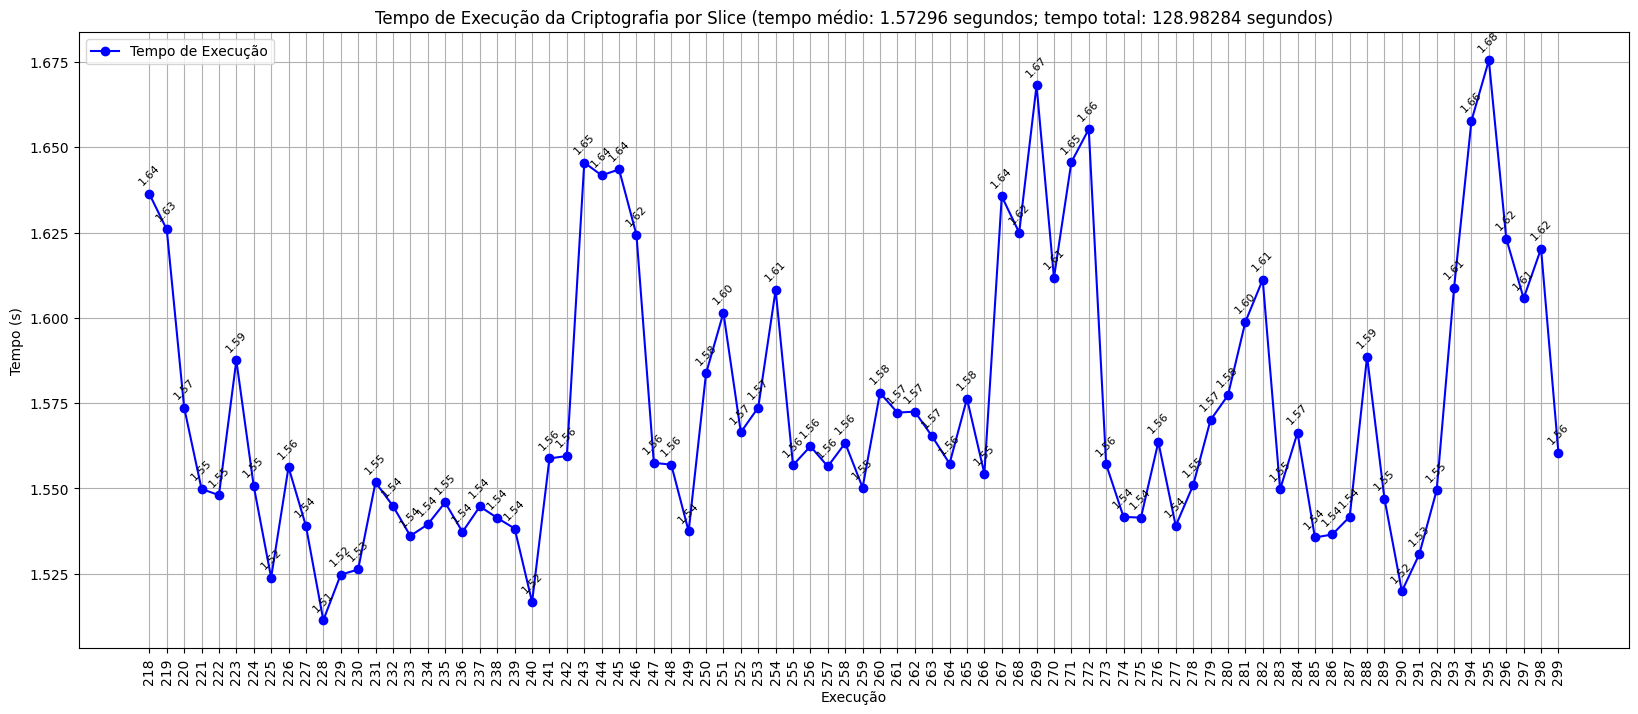

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, marker='o', linestyle='-', color='b', label='Tempo de Execução')

for x, y in zip(execucoes, tempos_execucao):
    plt.text(x, y + 0.002, f'{y:.2f}', ha='center', va='bottom', fontsize=8, rotation=45)
    
plt.xticks(execucoes, rotation=90)
plt.xlabel('Execução')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Criptografia por Slice (tempo médio: {np.mean(tempos_execucao):.5f} segundos; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)

plt.savefig('output_images/tempo_execucao_criptografia.png')

plt.show()